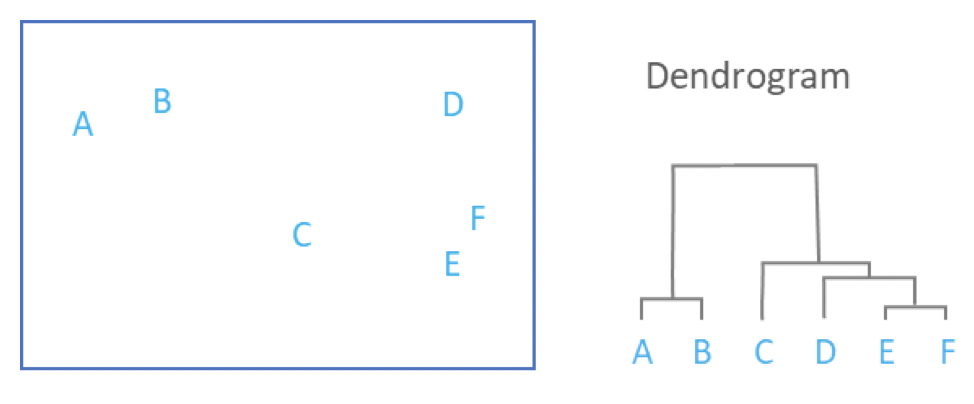

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
x=data.iloc[:,[0,1]]
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [8]:
plt.scatter(x['petal_length'],x['petal_width'])
plt.show()

KeyError: 'petal_length'

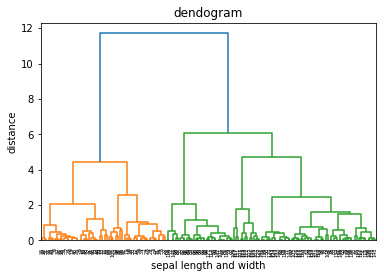

In [4]:
import scipy.cluster.hierarchy as sch

dg=sch.dendrogram(sch.linkage(x,method='ward'))#linkage function specifying the distance between two clusters(ward is a method of linkage)
plt.title('dendogram')
plt.xlabel('sepal length and width')
plt.ylabel('distance')
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
#affinity metric : How the distance between points calculated (euclidean is the default distance metric)
#linkage method : between which points the distance is calculated
#these are the main two things that influence the creation of final clusters and the outcome of the algorithm

pred_cluster=Ag.fit_predict(x)
pred_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

In [6]:
data['cluster']=pred_cluster
data

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [7]:
data.iloc[120:149,[4,5]]

,species,cluster
120,virginica,0
121,virginica,2
122,virginica,0
123,virginica,0
124,virginica,0
125,virginica,0
126,virginica,0
127,virginica,0
128,virginica,0
129,virginica,0


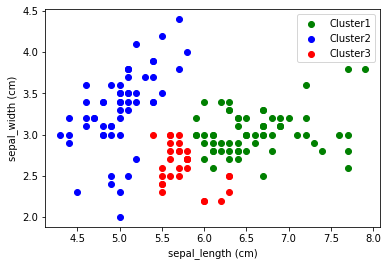

In [8]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1['sepal_length'],df1['sepal_width'],color='green',label='Cluster1')
plt.scatter(df2['sepal_length'],df2['sepal_width'],color='blue',label='Cluster2')
plt.scatter(df3['sepal_length'],df3['sepal_width'],color='red',label='Cluster3')



plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')

plt.legend()

plt.show()

from this we cant classify the cluster so taking another columns

In [10]:
x1=data.iloc[:,[2,3]]
x1

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


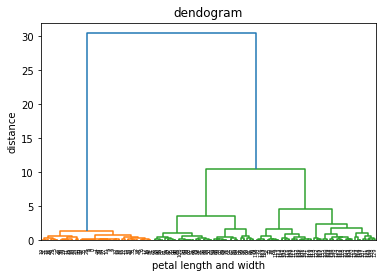

In [11]:
import scipy.cluster.hierarchy as sch

dg=sch.dendrogram(sch.linkage(x,method='ward'))#linkage function specifying the distance between two clusters(ward is a method of linkage)
plt.title('dendogram')
plt.xlabel('petal length and width')
plt.ylabel('distance')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
#affinity metric : How the distance between points calculated (euclidean is the default distance metric)
#linkage method : between which points the distance is calculated
#these are the main two things that influence the creation of final clusters and the outcome of the algorithm

pred_cluster=Ag.fit_predict(x1)
pred_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
data['cluster']=pred_cluster
data.to_string()

'     sepal_length  sepal_width  petal_length  petal_width     species  cluster\n0             5.1          3.5           1.4          0.2      setosa        1\n1             4.9          3.0           1.4          0.2      setosa        1\n2             4.7          3.2           1.3          0.2      setosa        1\n3             4.6          3.1           1.5          0.2      setosa        1\n4             5.0          3.6           1.4          0.2      setosa        1\n5             5.4          3.9           1.7          0.4      setosa        1\n6             4.6          3.4           1.4          0.3      setosa        1\n7             5.0          3.4           1.5          0.2      setosa        1\n8             4.4          2.9           1.4          0.2      setosa        1\n9             4.9          3.1           1.5          0.1      setosa        1\n10            5.4          3.7           1.5          0.2      setosa        1\n11            4.8          3.4         

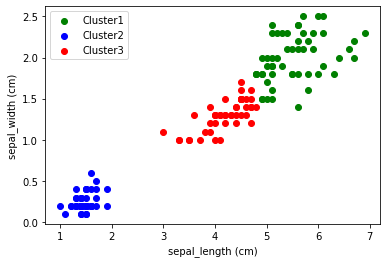

In [14]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1['petal_length'],df1['petal_width'],color='green',label='Cluster1')
plt.scatter(df2['petal_length'],df2['petal_width'],color='blue',label='Cluster2')
plt.scatter(df3['petal_length'],df3['petal_width'],color='red',label='Cluster3')



plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')

plt.legend()

plt.show()

# DBSCAN

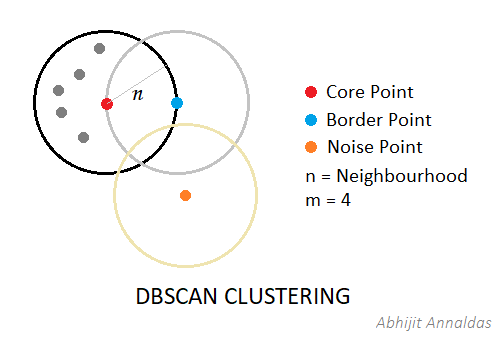

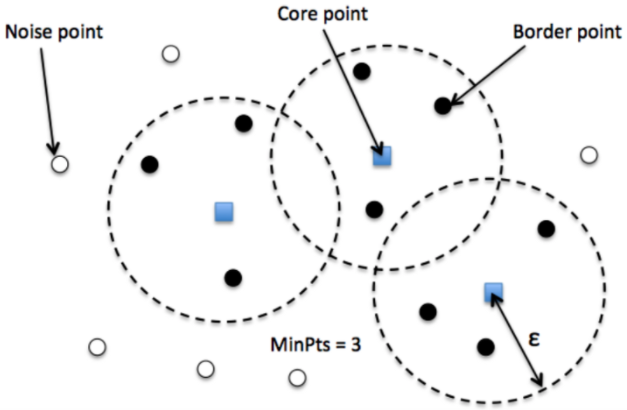

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:/Users/91799/OneDrive/Desktop/python basics/Mall_Customers (1).csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:>

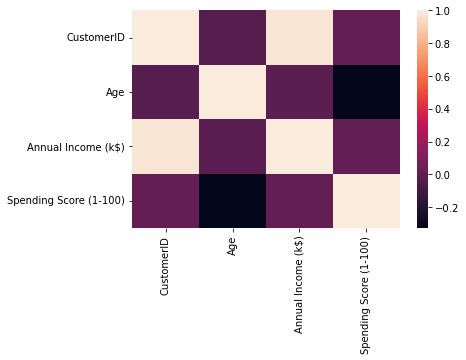

In [5]:
sns.heatmap(data.corr())

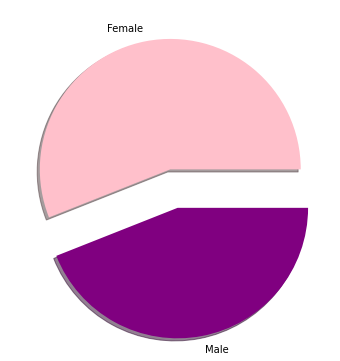

In [6]:
plt.figure(figsize=(6,6))
size=data['Genre'].value_counts()
label=['Female','Male']
color=['pink','purple']
explode=[0,0.3]

plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.show()


In [7]:
x=data.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=7,metric='euclidean')

In [9]:
model=db.fit(x)#fitting the model

In [10]:
labels=model.labels_ #how many clusters/groups we are getting
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2,  1,  2,  2,  1,  1,  1,  2,  1,  2,  1,
       -1, -1, -1,  2,  1,  1,  2,  1,  1, -1,  2,  1,  1,  1,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

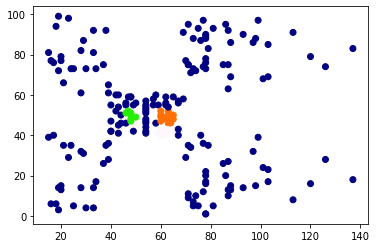

In [11]:
means=db.fit_predict(x)
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=means,cmap='gist_ncar')

In [12]:
n_clusters = len(set(labels))-(1 if -1 in labels else 0)#number of clusters in labels , ignoring noise if presnt

n_noise = list(labels).count(-1)
print('number of clusters: ',n_clusters)
print('number of noises: ',n_noise)

number of clusters:  3
number of noises:  171


In [13]:
data['cluster']=labels
data.tail(30)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
170,171,Male,40,87,13,-1
171,172,Male,28,87,75,-1
172,173,Male,36,87,10,-1
173,174,Male,36,87,92,-1
174,175,Female,52,88,13,-1
175,176,Female,30,88,86,-1
176,177,Male,58,88,15,-1
177,178,Male,27,88,69,-1
178,179,Male,59,93,14,-1
179,180,Male,35,93,90,-1


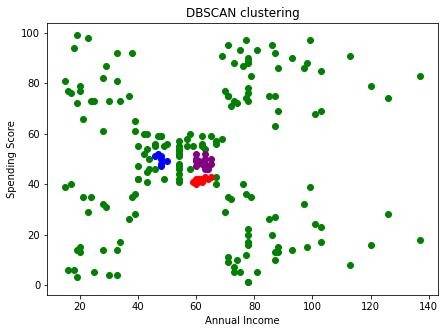

In [15]:
plt.figure(figsize=(7,5))

df1 = data[data.cluster==-1]
df2 = data[data.cluster==0]
df3 = data[data.cluster==1]
df4 = data[data.cluster==2]





plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green',label='Cluster-1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='blue',label='Cluster0')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='purple',label='Cluster1')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='red',label='Cluster2')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN clustering')
plt.show()